In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier

2018-05-06 21:15:11,985 : INFO : 'pattern' package not found; tag filters are not available for English
/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [3]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_batch = train_data[0:10000]
test_batch = test_data[0:50000]

In [4]:
sentences = []
for review in train_batch.text:
    sentences.append(review.split())

In [5]:
%%time
wv_model = Word2Vec(sentences, workers = 4)

2018-05-06 21:15:41,315 : INFO : collecting all words and their counts
2018-05-06 21:15:41,317 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-06 21:15:41,534 : INFO : collected 73895 word types from a corpus of 1149263 raw words and 10000 sentences
2018-05-06 21:15:41,535 : INFO : Loading a fresh vocabulary
2018-05-06 21:15:41,596 : INFO : min_count=5 retains 12972 unique words (17% of original 73895, drops 60923)
2018-05-06 21:15:41,597 : INFO : min_count=5 leaves 1062873 word corpus (92% of original 1149263, drops 86390)
2018-05-06 21:15:41,658 : INFO : deleting the raw counts dictionary of 73895 items
2018-05-06 21:15:41,660 : INFO : sample=0.001 downsamples 46 most-common words
2018-05-06 21:15:41,661 : INFO : downsampling leaves estimated 811491 word corpus (76.3% of prior 1062873)
2018-05-06 21:15:41,702 : INFO : estimated required memory for 12972 words and 100 dimensions: 16863600 bytes
2018-05-06 21:15:41,703 : INFO : resetting layer weights

CPU times: user 14.4 s, sys: 69.5 ms, total: 14.4 s
Wall time: 4.36 s


In [6]:
len(wv_model.wv.vocab)

12972

In [9]:
wv_model.wv.vocab

{'I': <gensim.models.keyedvectors.Vocab at 0x7fb57c7625c0>,
 "don't": <gensim.models.keyedvectors.Vocab at 0x7fb52b63e400>,
 'usual': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e438>,
 'write': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e470>,
 'reviews': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e518>,
 'but': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e550>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e4a8>,
 'this': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e4e0>,
 'place': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e588>,
 'will': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e5c0>,
 'make': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e5f8>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e630>,
 'exception.': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e668>,
 'The': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e6a0>,
 'service': <gensim.models.keyedvectors.Vocab at 0x7fb52b63e6d8>,
 'was': <gensim.models.keyedvectors.Vocab at 0x

In [11]:
wv_model.wv['food']

array([ 1.3360815 , -0.17231049,  1.4496334 ,  0.21145771, -0.5117277 ,
        1.1989751 , -1.2266021 ,  1.1499907 ,  0.16003968,  1.092049  ,
       -0.11523978, -3.6961162 ,  1.4701844 ,  0.33083394, -0.5081195 ,
        1.0961515 ,  0.05744336,  1.1016932 ,  0.71568507, -1.7341521 ,
       -0.3304279 ,  0.94013816,  0.91625315, -0.6302037 ,  0.9716489 ,
       -0.20572622, -1.1160283 , -1.5914044 , -0.45692763, -0.23536862,
       -0.45505026, -1.4484156 ,  0.11493752, -1.5778394 ,  0.17011428,
        0.8161822 ,  0.64678836, -0.11234519,  0.33507046,  0.7375565 ,
        0.6568933 ,  0.8685464 ,  2.2058933 , -1.5591141 , -0.60978615,
       -0.02542748, -2.296341  ,  0.00621982, -0.3151097 ,  1.9765801 ,
       -1.0476165 ,  0.7553263 ,  0.05074645, -0.26084808, -1.0683048 ,
        0.29066652,  0.92533606, -0.52832234, -1.3198678 , -2.5131888 ,
        0.78951484,  0.4817993 ,  0.6473069 ,  0.09680504, -0.75423807,
        1.2375543 , -1.5367248 ,  0.8843722 ,  1.9695457 , -0.00

In [13]:
def build_sentences_vector(sentence):
    words = sentence.split()
    result = np.zeros(100)
    size = 0
    for word in words:
        if word in wv_model.wv.vocab:
            result+=wv_model.wv[word]
            size+=1
    if size == 0:
        size = 1
    result /= size
    return result

In [15]:
train_data_features = []
for sentense in train_batch.text:    
    train_data_features.append(build_sentences_vector(sentense))

In [18]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=3, C=1e5)
logreg = logreg.fit(train_data_features, train_batch.stars)

/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(self.n_jobs))


CPU times: user 25.3 s, sys: 15.1 ms, total: 25.3 s
Wall time: 25.4 s


In [17]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(data.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

In [20]:
%%time
test_batch_transform = []
for sentense in test_batch.text:    
    test_batch_transform.append(build_sentences_vector(sentense))
predicted = logreg.predict(test_batch_transform)

CPU times: user 17.1 s, sys: 27.9 ms, total: 17.2 s
Wall time: 17.3 s


accuracy 0.54994
confusion matrix
 [[ 4306   168   170   505  1725]
 [ 1347   210   407  1080  1012]
 [  757   194   675  2681  1615]
 [  558   109   417  4382  6242]
 [  760    77   170  2509 17924]]
(row=expected, col=predicted)


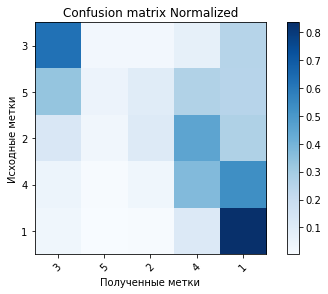

In [21]:
evaluate_prediction(predicted, test_batch.stars)